In [41]:
import librosa
import numpy as np
import scipy
import matplotlib.pyplot as plt    
import seaborn
from IPython.display import Audio
from mpl_toolkits.mplot3d import Axes3D
from scipy.fft import fft
from scipy.io import wavfile
from scipy import signal

seaborn.set(style='ticks')

In [42]:
signal_array = []

signaal1, sr1 = librosa.load("output1voice.wav")
signaal2, sr2 = librosa.load("output2voice.wav")
signaal3, sr3 = librosa.load("output3voice.wav")
signaal4, sr4 = librosa.load("output4voice.wav")
signaal5, sr5 = librosa.load("output5voice.wav")
signaal6, sr6 = librosa.load("output6voice.wav")
signaal7, sr7 = librosa.load("output7voice.wav")
signaal8, sr8 = librosa.load("output8voice.wav")

signal_array.append(signaal1)
signal_array.append(signaal2)
signal_array.append(signaal3)
signal_array.append(signaal4)
signal_array.append(signaal5)
signal_array.append(signaal6)
signal_array.append(signaal7)
signal_array.append(signaal8)

In [43]:
signal_array2 = []

signaal1, sr1 = librosa.load("output9voice.wav")
signaal2, sr2 = librosa.load("output10voice.wav")
signaal3, sr3 = librosa.load("output11voice.wav")
signaal4, sr4 = librosa.load("output12voice.wav")
signaal5, sr5 = librosa.load("output13voice.wav")
signaal6, sr6 = librosa.load("output14voice.wav")
signaal7, sr7 = librosa.load("output15voice.wav")
signaal8, sr8 = librosa.load("output16voice.wav")

signal_array2.append(signaal1)
signal_array2.append(signaal2)
signal_array2.append(signaal3)
signal_array2.append(signaal4)
signal_array2.append(signaal5)
signal_array2.append(signaal6)
signal_array2.append(signaal7)
signal_array2.append(signaal8)

In [44]:
signal_array3 = []

signaal1, sr1 = librosa.load("output17voice.wav")
signaal2, sr2 = librosa.load("output18voice.wav")
signaal3, sr3 = librosa.load("output19voice.wav")
signaal4, sr4 = librosa.load("output20voice.wav")
signaal5, sr5 = librosa.load("output21voice.wav")
signaal6, sr6 = librosa.load("output22voice.wav")
signaal7, sr7 = librosa.load("output23voice.wav")
signaal8, sr8 = librosa.load("output24voice.wav")

signal_array3.append(signaal1)
signal_array3.append(signaal2)
signal_array3.append(signaal3)
signal_array3.append(signaal4)
signal_array3.append(signaal5)
signal_array3.append(signaal6)
signal_array3.append(signaal7)
signal_array3.append(signaal8)

In [45]:
signal_array4 = []

signaal1, sr1 = librosa.load("fourth_measure/output25voice.wav")
signaal2, sr2 = librosa.load("fourth_measure/output26voice.wav")
signaal3, sr3 = librosa.load("fourth_measure/output27voice.wav")
signaal4, sr4 = librosa.load("fourth_measure/output28voice.wav")
signaal5, sr5 = librosa.load("fourth_measure/output29voice.wav")
signaal6, sr6 = librosa.load("fourth_measure/output30voice.wav")
signaal7, sr7 = librosa.load("fourth_measure/output31voice.wav")
signaal8, sr8 = librosa.load("fourth_measure/output32voice.wav")
signaal9, sr9 = librosa.load("fourth_measure/output33voice.wav")
signaal10, sr10 = librosa.load("fourth_measure/output34voice.wav")
signaal11, sr11 = librosa.load("fourth_measure/output35voice.wav")
signaal12, sr12 = librosa.load("fourth_measure/output36voice.wav")
signaal13, sr13 = librosa.load("fourth_measure/output37voice.wav")
signaal14, sr14 = librosa.load("fourth_measure/output38voice.wav")


signal_array4.append(signaal1)
signal_array4.append(signaal2)
signal_array4.append(signaal3)
signal_array4.append(signaal4)
signal_array4.append(signaal5)
signal_array4.append(signaal6)
signal_array4.append(signaal7)
signal_array4.append(signaal8)
signal_array4.append(signaal9)
signal_array4.append(signaal10)
signal_array4.append(signaal11)
signal_array4.append(signaal12)
signal_array4.append(signaal13)
signal_array4.append(signaal14)

signal_array5 = []

signaal1, sr1 = librosa.load("fourth_measure/output39voice.wav")
signaal2, sr2 = librosa.load("fourth_measure/output40voice.wav")
signaal3, sr3 = librosa.load("fourth_measure/output41voice.wav")
signaal4, sr4 = librosa.load("fourth_measure/output42voice.wav")
signaal5, sr5 = librosa.load("fourth_measure/output43voice.wav")
signaal6, sr6 = librosa.load("fourth_measure/output44voice.wav")
signaal7, sr7 = librosa.load("fourth_measure/output45voice.wav")
signaal8, sr8 = librosa.load("fourth_measure/output46voice.wav")
signaal9, sr9 = librosa.load("fourth_measure/output47voice.wav")
signaal10, sr10 = librosa.load("fourth_measure/output48voice.wav")
signaal11, sr11 = librosa.load("fourth_measure/output49voice.wav")
signaal12, sr12 = librosa.load("fourth_measure/output50voice.wav")
signaal13, sr13 = librosa.load("fourth_measure/output51voice.wav")
signaal14, sr14 = librosa.load("fourth_measure/output52voice.wav")


signal_array5.append(signaal1)
signal_array5.append(signaal2)
signal_array5.append(signaal3)
signal_array5.append(signaal4)
signal_array5.append(signaal5)
signal_array5.append(signaal6)
signal_array5.append(signaal7)
signal_array5.append(signaal8)
signal_array5.append(signaal9)
signal_array5.append(signaal10)
signal_array5.append(signaal11)
signal_array5.append(signaal12)
signal_array5.append(signaal13)
signal_array5.append(signaal14)

signal_array6 = []

signaal1, sr1 = librosa.load("fourth_measure/output53voice.wav")
signaal2, sr2 = librosa.load("fourth_measure/output54voice.wav")
signaal3, sr3 = librosa.load("fourth_measure/output55voice.wav")
signaal4, sr4 = librosa.load("fourth_measure/output56voice.wav")
signaal5, sr5 = librosa.load("fourth_measure/output57voice.wav")
signaal6, sr6 = librosa.load("fourth_measure/output58voice.wav")
signaal7, sr7 = librosa.load("fourth_measure/output59voice.wav")
signaal8, sr8 = librosa.load("fourth_measure/output60voice.wav")
signaal9, sr9 = librosa.load("fourth_measure/output61voice.wav")
signaal10, sr10 = librosa.load("fourth_measure/output62voice.wav")
signaal11, sr11 = librosa.load("fourth_measure/output63voice.wav")
signaal12, sr12 = librosa.load("fourth_measure/output64voice.wav")
signaal13, sr13 = librosa.load("fourth_measure/output65voice.wav")
signaal14, sr14 = librosa.load("fourth_measure/output66voice.wav")


signal_array6.append(signaal1)
signal_array6.append(signaal2)
signal_array6.append(signaal3)
signal_array6.append(signaal4)
signal_array6.append(signaal5)
signal_array6.append(signaal6)
signal_array6.append(signaal7)
signal_array6.append(signaal8)
signal_array6.append(signaal9)
signal_array6.append(signaal10)
signal_array6.append(signaal11)
signal_array6.append(signaal12)
signal_array6.append(signaal13)
signal_array6.append(signaal14)

In [46]:
noise, sr99 = librosa.load("noise5.wav")
noise_delta, sr100 = librosa.load("noise_delta.wav")

<h2>SNR calculation</h2>

In [47]:
snr_list = []
snr_list2 = []
snr_list3 = []

snr_list4 = []
snr_list5 = []
snr_list6 = []

counter = 0
for sig in signal_array:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array2:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list2.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array3:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list3.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array4:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list4.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array5:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list5.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

for sig in signal_array6:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list6.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

SNR value for the recording number 1  (dB): 15.390338897705078
SNR value for the recording number 2  (dB): 13.076218366622925
SNR value for the recording number 3  (dB): 9.993770718574524
SNR value for the recording number 4  (dB): 6.117786169052124
SNR value for the recording number 5  (dB): 3.727346658706665
SNR value for the recording number 6  (dB): 3.972020745277405
SNR value for the recording number 7  (dB): 3.098652958869934
SNR value for the recording number 8  (dB): 3.4758782386779785
SNR value for the recording number 9  (dB): 14.286054372787476
SNR value for the recording number 10  (dB): 15.4360032081604
SNR value for the recording number 11  (dB): 8.460477590560913
SNR value for the recording number 12  (dB): 4.181914925575256
SNR value for the recording number 13  (dB): 3.1489303708076477
SNR value for the recording number 14  (dB): 2.7475643157958984
SNR value for the recording number 15  (dB): 3.0757594108581543
SNR value for the recording number 16  (dB): 3.30514192581

<h2>Speech recognition</h2>

In [48]:
import speech_recognition as sr
import editdistance
r = sr.Recognizer()

In [61]:
sound = sr.AudioFile('fourth_measure/output62voice.wav')

with sound as source:
    audio = r.record(source)
eesti_text = r.recognize_google(audio, language="et-EE")

print("Recognized text:", eesti_text)

Recognized text: püsiv stress võib muuta seda kuidas sa end tunned see võib tekitada depressiooni või sa võid haigeks jääda


<h2>Visual data representation, tests 1-3 for 4 meters, text audio</h2>

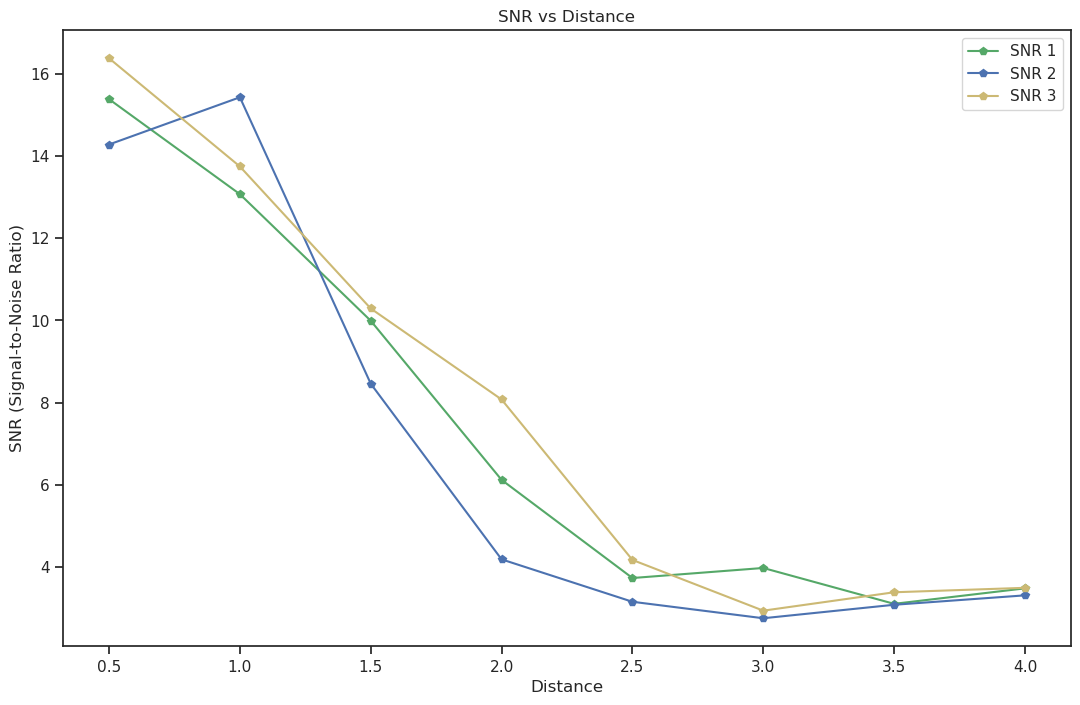

In [63]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4]

plt.figure(figsize=(13, 8))
plt.plot(distance_points, snr_list, marker='p', linestyle='-', color='g', label='SNR 1')
plt.plot(distance_points, snr_list2, marker='p', linestyle='-', color='b', label='SNR 2')
plt.plot(distance_points, snr_list3, marker='p', linestyle='-', color='y', label='SNR 3')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.legend() 
plt.show()

#REMEASURE USING THE ESTONIAN RECORDING WITH MY RODE NT1 MIC, THEN PLAY THE RECODING WITH A SINGLE SPEAKER

#Do these measurements multiple times, change the env, chnage the directionality

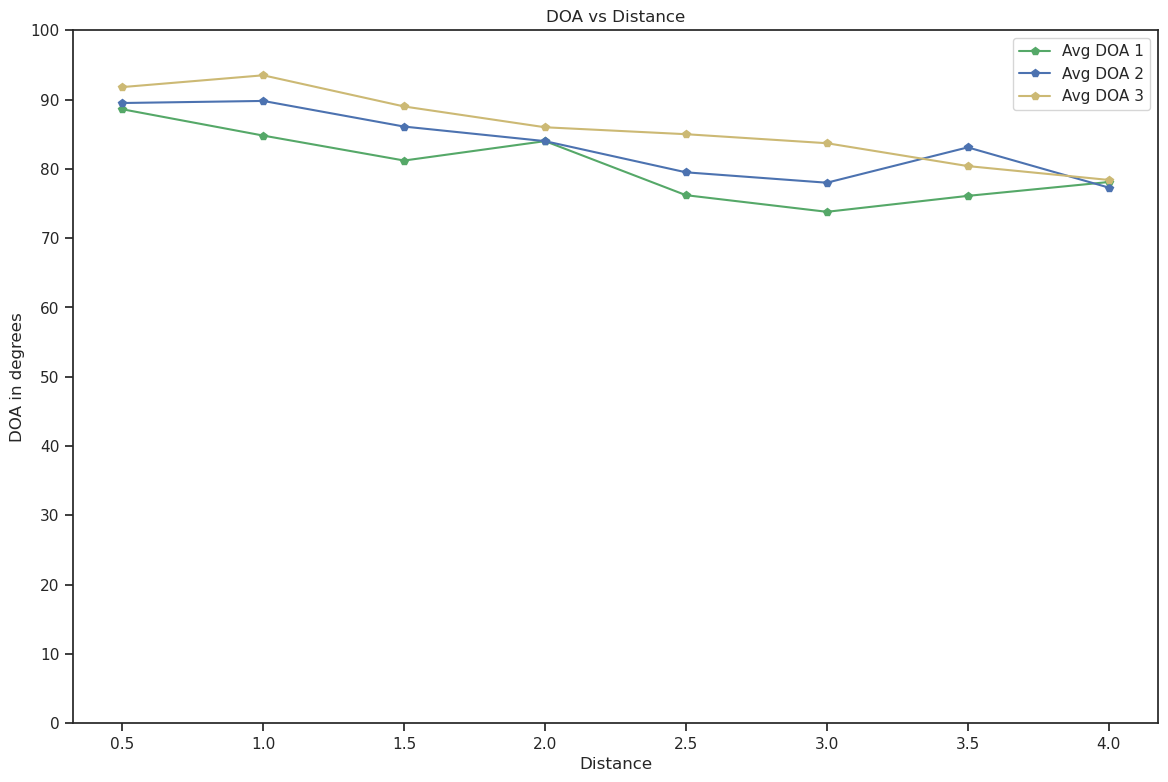

In [65]:
avg_doa = [88.6,84.8,81.2,84,76.2,73.8,76.1,78.1]
avg_doa2 = [89.5,89.8,86.1,84,79.5,78,83.1,77.3]
avg_doa3 = [91.8,93.5,89,86,85,83.7,80.4,78.4]


plt.figure(figsize=(14, 9))
plt.plot(distance_points, avg_doa, marker='p', linestyle='-', color='g', label='Avg DOA 1')
plt.plot(distance_points, avg_doa2, marker='p', linestyle='-', color='b', label='Avg DOA 2')
plt.plot(distance_points, avg_doa3, marker='p', linestyle='-', color='y', label='Avg DOA 3')

plt.xlabel('Distance')
plt.ylabel('DOA in degrees')
plt.title('DOA vs Distance')
plt.ylim(0, 100)
plt.yticks(np.arange(0, 110, 10)) 
plt.legend()  

plt.show()

#3d graph of either 0 to 90 angle with x for distance and y for distance and z for SNR
#do the same thing for 4 channels from recording, can we even do it - try to get the raw data
#Also measuring directly from one of four mics in the same way for either all channels combined or 4 channels separated.
#try to measure with a sinewave
#do more distance tests
#echo test? -> different envorinments, try the rough envs
#the reaction to multiple people talking?
#run the sin wive from 20 to 20000 Hz (frequency sweep) -> frequency response check in comparison to the mic graph on the website

#make an algorithm so that it would stick to one signal coming (so that the robot keep looking at you while others talking) -> for later


#for later -> for male/female voice/estonian speech with an accent

#DAW recording filterings? that's for later.


In [115]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
    theta=avg_doa,
    mode='markers',
    marker=dict(color='green'),
    name='Avg DOA 1'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
    theta=avg_doa2,
    mode='markers',
    marker=dict(color='blue'),
    name='Avg DOA 2'
))

fig.add_trace(go.Scatterpolar(
    r=[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
    theta=avg_doa3,
    mode='markers',
    marker=dict(color='yellow'),
    name='Avg DOA 3'
))

fig.update_layout(
    showlegend=True,
    title='DOA vs distance in relation to 90 degrees'
)
fig.show()

In [54]:
#Then try to calculate the speech error and do it for a straight angle as well

def error_rate(correct_text, recognized_text):
    return editdistance.eval(correct_text, recognized_text) / len(correct_text)

error_rates = []
error_rates2 = []
error_rates3 = []

correct = "püsiv stress võib muuta seda kuidas sa end tunned see võib tekitada depressiooni või sa võid haigeks jääda"

for i in range(1,9):
    audio_path = f'output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(9,17):
    audio_path = f'output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates2.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(17,25):
    audio_path = f'output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates3.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)


Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.04716981132075472
Error rate:  0.02830188679245283
Error rate:  0.02830188679245283
Error rate:  0.02830188679245283
Error rate:  0.03773584905660377
Error rate:  0.02830188679245283
Error rate:  0.09433962264150944
Error rate:  0.02830188679245283
Error rate:  0.04716981132075472
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377


In [55]:
error_rates4 = []
error_rates5 = []
error_rates6 = []

for i in range(25,39):
    audio_path = f'fourth_measure/output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates4.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(39,53):
    audio_path = f'fourth_measure/output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates5.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

for i in range(53,67):
    audio_path = f'fourth_measure/output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates6.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

Error rate:  0.02830188679245283
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.04716981132075472
Error rate:  0.0660377358490566
Error rate:  0.0660377358490566
Error rate:  0.0660377358490566
Error rate:  0.04716981132075472
Error rate:  0.03773584905660377
Error rate:  0.018867924528301886
Error rate:  0.03773584905660377
Error rate:  0.04716981132075472
Error rate:  0.04716981132075472
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.03773584905660377
Error rate:  0.04716981132075472
Error rate:  0.05660377358490566
Error rate:  0.0660377358490566
Error rate:  0.0660377358490566
Error rate:  0.07547169811320754
Error rate:  0.0660377358490566
Error rate:  0.05660377358490566
Error rate:  0.22641509433962265
Error rate:  0.19811320754716982
Error rate:  0.0660377358490566
Error rate:  0.02830188679245283
Error rate:  0.03773584905660377
Error rate:  0.0

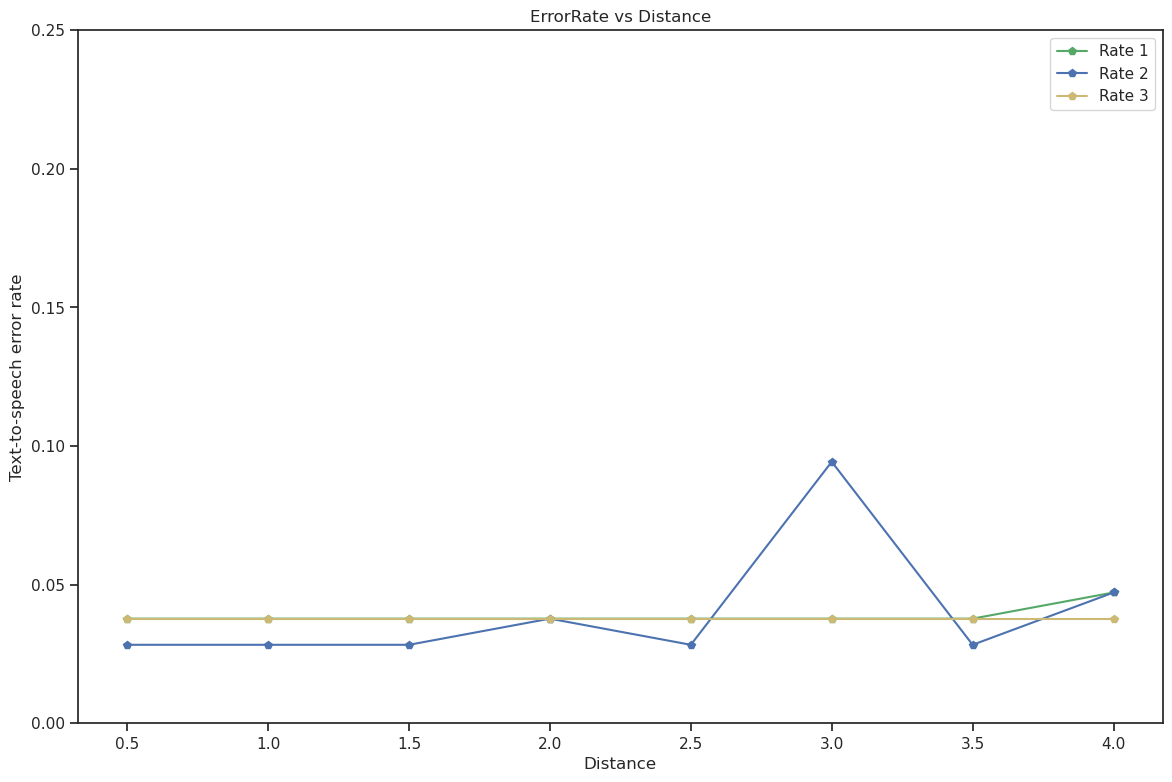

In [113]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g',label='Rate 1')
plt.plot(distance_points, error_rates2, marker='p', linestyle='-', color='b', label='Rate 2')
plt.plot(distance_points, error_rates3, marker='p', linestyle='-', color='y', label='Rate 3')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech error rate')
plt.title('ErrorRate vs Distance')
plt.ylim(0,0.25)
plt.legend()
plt.show()

<h2>Visual data representation, tests 4-6 for 4> meters in Delta 2024, text audio</h2>

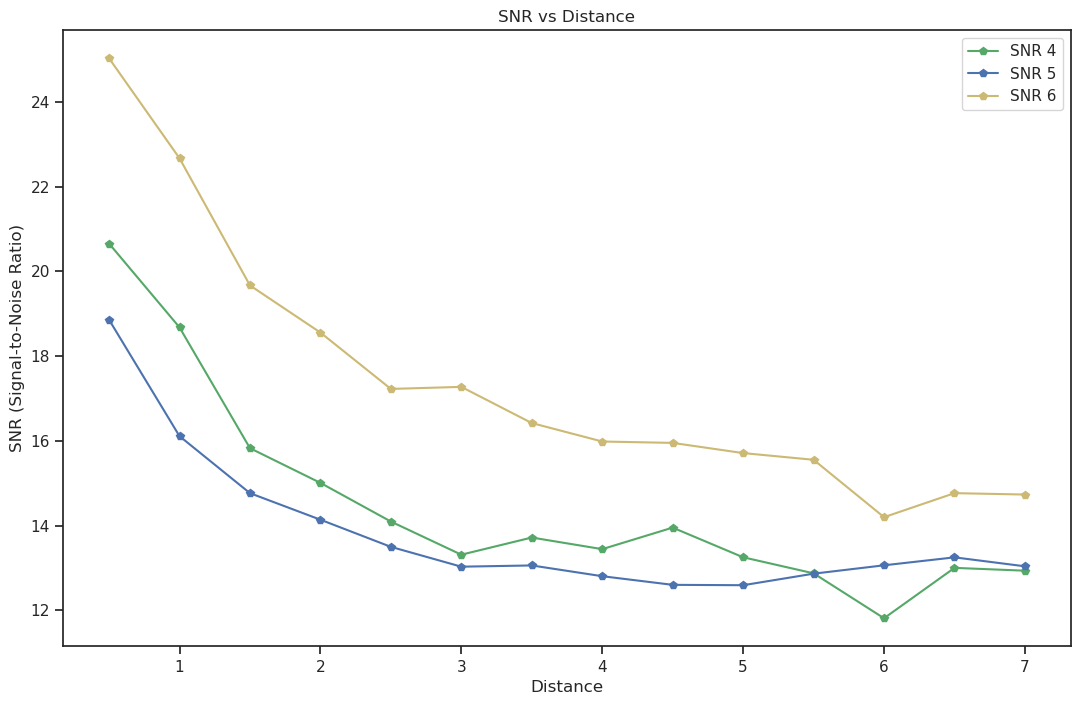

In [57]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]

plt.figure(figsize=(13, 8))
plt.plot(distance_points, snr_list4, marker='p', linestyle='-', color='g', label='SNR 4')
plt.plot(distance_points, snr_list5, marker='p', linestyle='-', color='b', label='SNR 5')
plt.plot(distance_points, snr_list6, marker='p', linestyle='-', color='y', label='SNR 6')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.legend() 
plt.show()

#REMEASURE USING THE ESTONIAN RECORDING WITH MY RODE NT1 MIC, THEN PLAY THE RECODING WITH A SINGLE SPEAKER

#Do these measurements multiple times, change the env, chnage the directionality

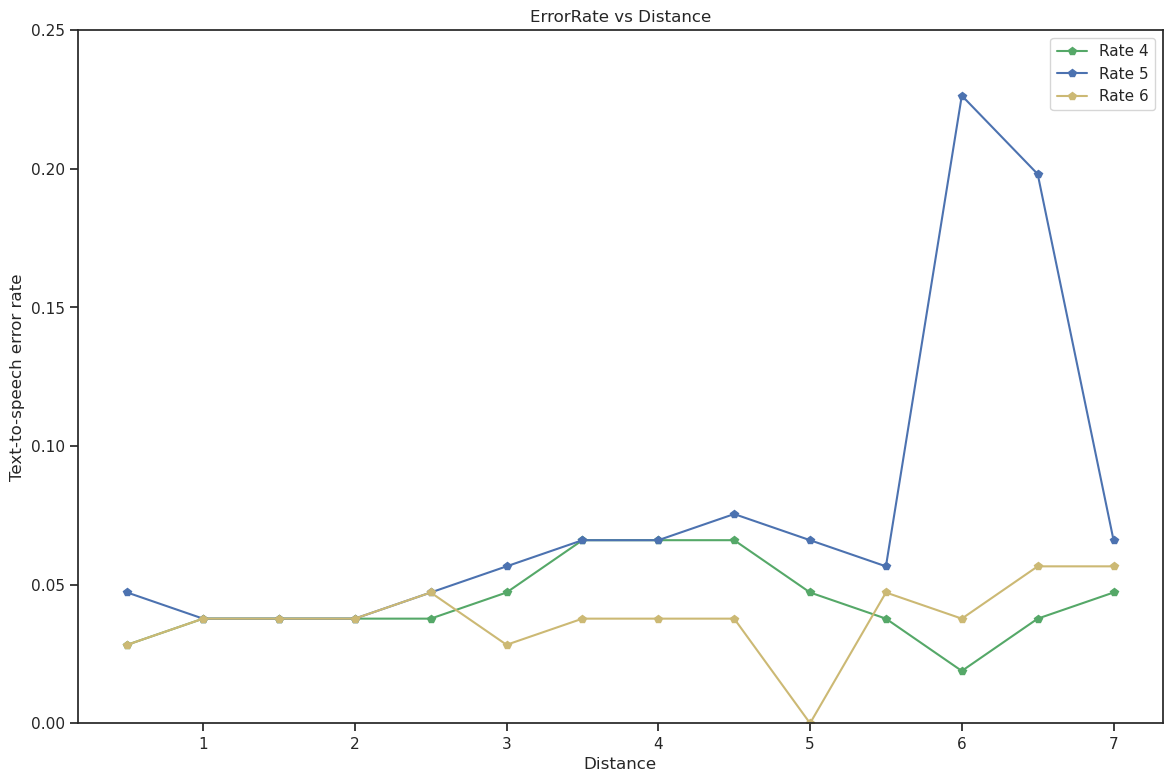

In [58]:
plt.figure(figsize=(14, 9))
plt.plot(distance_points, error_rates4, marker='p', linestyle='-', color='g',label='Rate 4')
plt.plot(distance_points, error_rates5, marker='p', linestyle='-', color='b', label='Rate 5')
plt.plot(distance_points, error_rates6, marker='p', linestyle='-', color='y', label='Rate 6')


plt.xlabel('Distance')
plt.ylabel('Text-to-speech error rate')
plt.title('ErrorRate vs Distance')
plt.ylim(0,0.25)
plt.legend()
plt.show()

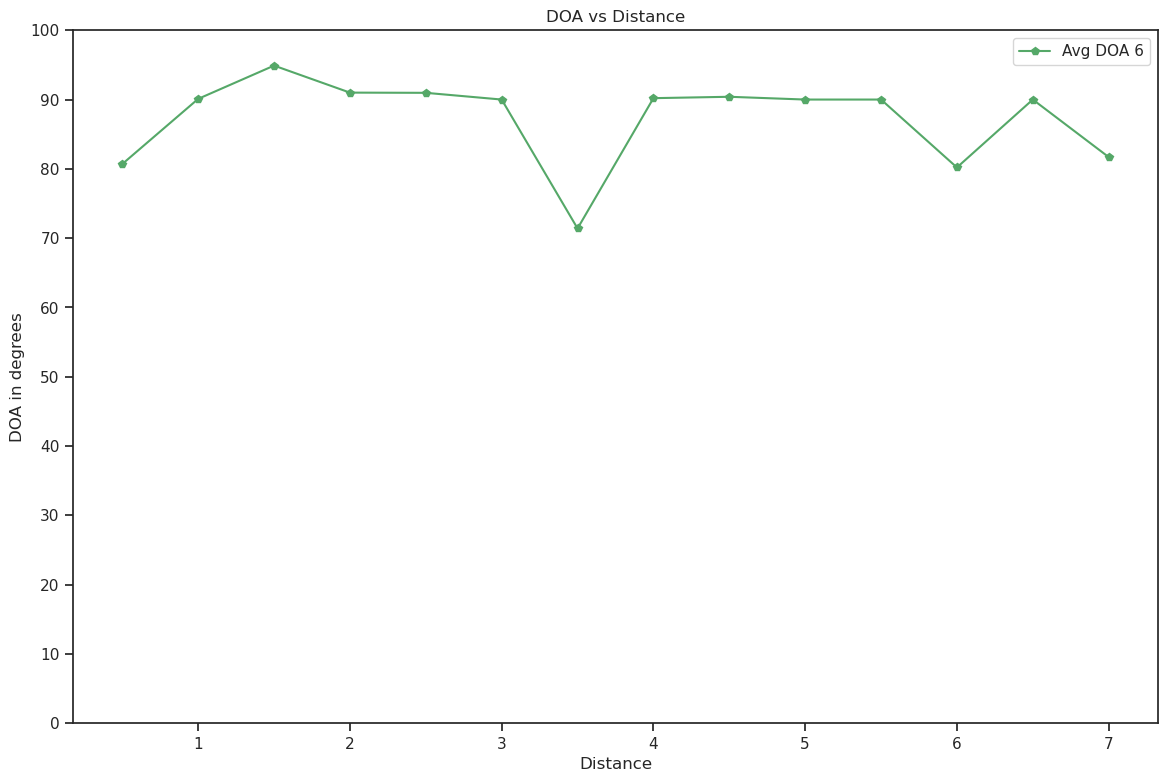

In [59]:
avg_doa6 = [80.7,90.1,94.9,91,90.97,90,71.4,90.2,90.4,90,90,80.2,90,81.7]

plt.figure(figsize=(14, 9))
plt.plot(distance_points, avg_doa6, marker='p', linestyle='-', color='g', label='Avg DOA 6')

plt.xlabel('Distance')
plt.ylabel('DOA in degrees')
plt.title('DOA vs Distance')
plt.ylim(0, 100)
plt.yticks(np.arange(0, 110, 10)) 
plt.legend()  

plt.show()

In [117]:
fig = go.Figure(data=
    go.Scatterpolar(
        r = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7],
        theta = avg_doa6,
        marker=dict(color='green'),
        mode = 'markers',
        name='Avg DOA 6',
    ))

fig.update_layout(
    showlegend=True,
    title='DOA vs distance in relation to 90 degrees'
)
fig.show()

<h2>Second experiment</h2>

In [ ]:
signal_array_sin = []

signaal1, sr1 = librosa.load("fourth_measure/output1sin.wav")
signaal2, sr2 = librosa.load("fourth_measure/output2sin.wav")
signaal3, sr3 = librosa.load("fourth_measure/output3sin.wav")
signaal4, sr4 = librosa.load("fourth_measure/output4sin.wav")
signaal5, sr5 = librosa.load("fourth_measure/output5sin.wav")
signaal6, sr6 = librosa.load("fourth_measure/output6sin.wav")
signaal7, sr7 = librosa.load("fourth_measure/output7sin.wav")
signaal8, sr8 = librosa.load("fourth_measure/output8sin.wav")
signaal9, sr9 = librosa.load("fourth_measure/output9sin.wav")
signaal10, sr10 = librosa.load("fourth_measure/output10sin.wav")
signaal11, sr11 = librosa.load("fourth_measure/output11sin.wav")
signaal12, sr12 = librosa.load("fourth_measure/output12sin.wav")
signaal13, sr13 = librosa.load("fourth_measure/output13sin.wav")
signaal14, sr14 = librosa.load("fourth_measure/output14sin.wav")


signal_array_sin.append(signaal1)
signal_array_sin.append(signaal2)
signal_array_sin.append(signaal3)
signal_array_sin.append(signaal4)
signal_array_sin.append(signaal5)
signal_array_sin.append(signaal6)
signal_array_sin.append(signaal7)
signal_array_sin.append(signaal8)
signal_array_sin.append(signaal9)
signal_array_sin.append(signaal10)
signal_array_sin.append(signaal11)
signal_array_sin.append(signaal12)
signal_array_sin.append(signaal13)
signal_array_sin.append(signaal14)

In [ ]:
noise, sr9 = librosa.load("noise_delta.wav")

In [ ]:
snr_list_sin = []
counter = 0
for sig in signal_array_sin:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list_sin.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

SNR value for the recording number 1  (dB): 20.447275638580322
SNR value for the recording number 2  (dB): 14.029543399810791
SNR value for the recording number 3  (dB): 3.00667405128479
SNR value for the recording number 4  (dB): 10.487396717071533
SNR value for the recording number 5  (dB): 19.256714582443237
SNR value for the recording number 6  (dB): 31.664810180664062
SNR value for the recording number 7  (dB): 23.260366916656494
SNR value for the recording number 8  (dB): 32.31635808944702


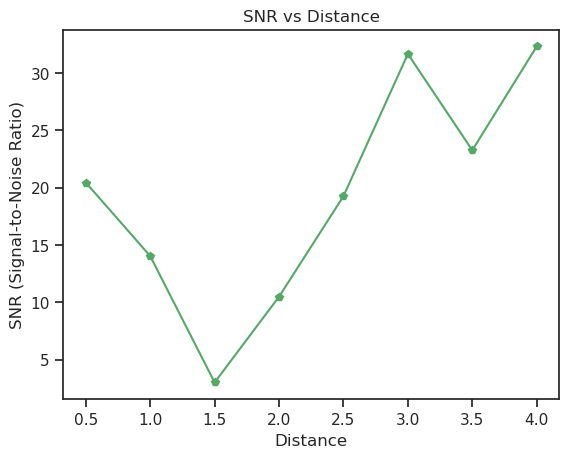

In [ ]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]
plt.plot(distance_points, snr_list_sin, marker='p', linestyle='-', color='g')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.show()

#repeat, perhaps noise supresssion?

<h2>Frequency response curve</h2>

In [ ]:
sample_rate, audio_data = wavfile.read("sweep.wav") 
print(sample_rate)

16000


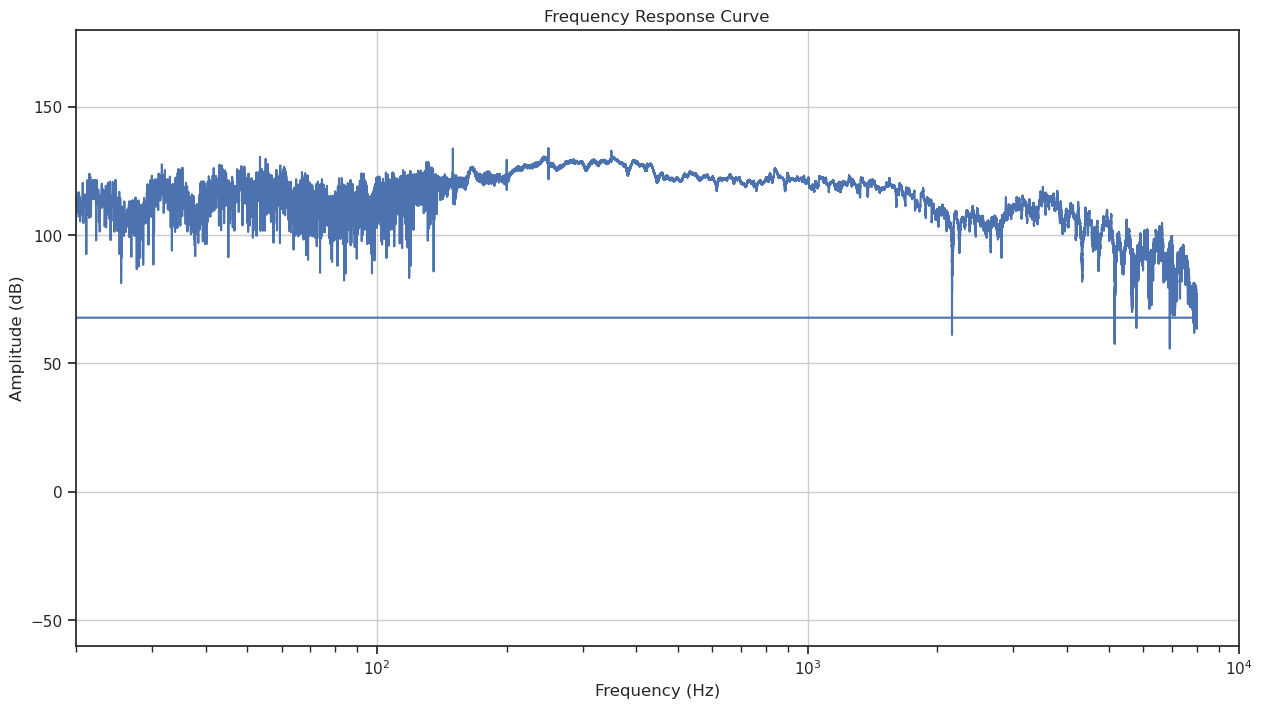

In [ ]:
# Perform FFT on the audio data
fft_result = fft(audio_data)
# Calculate the frequency values corresponding to the FFT result
freq_values = np.fft.fftfreq(len(fft_result), 1/sample_rate)
fig, ax = plt.subplots(figsize=(15, 8))
# Set the frequency range and y-axis limits
frequency_range = (20, 10000)
y_axis_limits = (-60, 180)

# Plot the frequency response curve
plt.plot(freq_values, 20 * np.log10(np.abs(fft_result)))
plt.xscale('log')  # Use a logarithmic scale for better visualization

# Set x-axis and y-axis limits
plt.xlim(frequency_range)
plt.ylim(y_axis_limits)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Frequency Response Curve')
plt.grid(True)
plt.show()


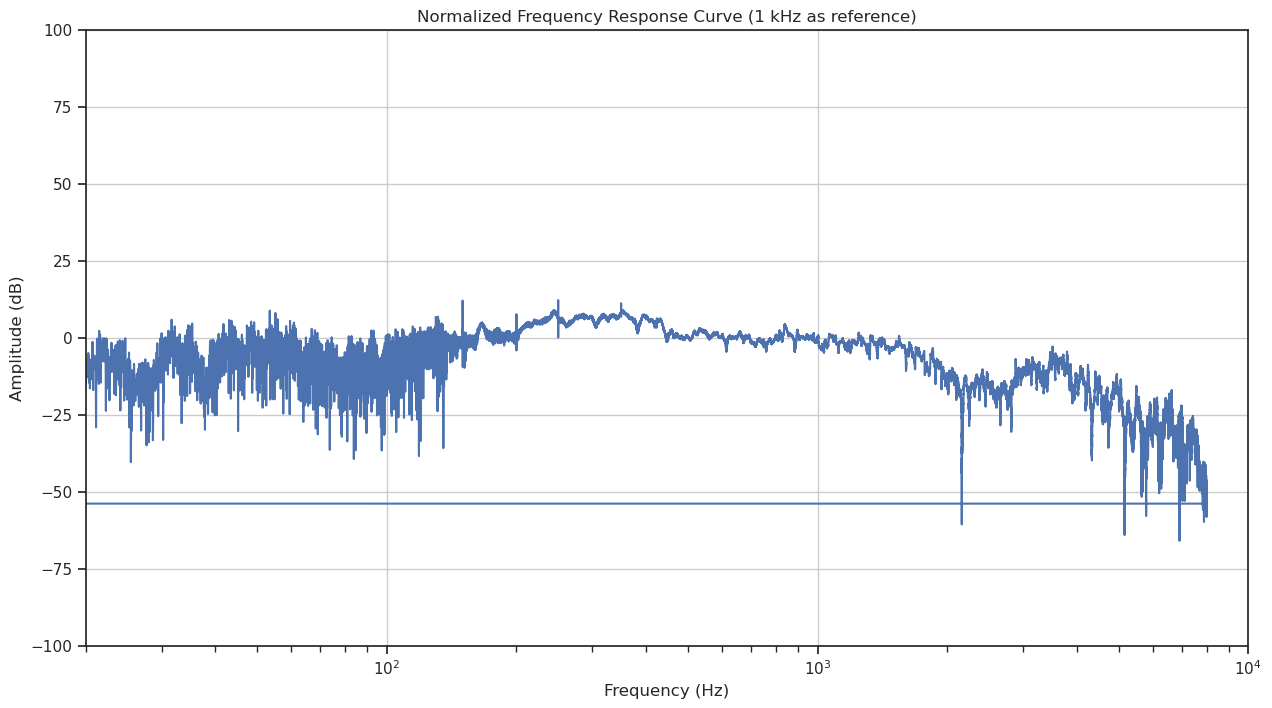

In [ ]:
fft_result = fft(audio_data)

# Calculate the frequency values corresponding to the FFT result
freq_values = np.fft.fftfreq(len(fft_result), 1/sample_rate)

# Find the index corresponding to 1 kHz
one_khz_index = np.argmin(np.abs(freq_values - 1000))

# Normalize the magnitude by the value at 1 kHz
normalized_magnitude = 20 * np.log10(np.abs(fft_result) / np.abs(fft_result[one_khz_index]))

# Set the frequency range and y-axis limits
frequency_range = (20, 10000)
y_axis_limits = (-100, 100)

# Plot the frequency response curve
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(freq_values, normalized_magnitude)
plt.xscale('log')  # Use a logarithmic scale for better visualization

# Set x-axis and y-axis limits
plt.xlim(frequency_range)
plt.ylim(y_axis_limits)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Normalized Frequency Response Curve (1 kHz as reference)')
plt.grid(True)
plt.show()